In [ ]:
install.packages(c("tidyverse", "data.table", "caret", "e1071", "Hmisc"))
library(tidyverse)
library(data.table)
options(repr.plot.width=10, reper.plot.height=10)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘checkmate’, ‘htmlwidgets’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘proxy’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘Formula’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

In [ ]:
#https://drive.google.com/file/d/14TGnFaPQZdifHG9migc4iCFHPD3Gqi3l/view?usp=share_link

system("gdown --id 14TGnFaPQZdifHG9migc4iCFHPD3Gqi3l")
system("ls", TRUE)

[1] "sample_data"       "titanic_train.csv"

In [ ]:
DF <- fread("/content/titanic_train.csv", header = T, encoding = "UTF-8") %>% as_tibble()
DF %>% show()

# A tibble: 891 × 12
   PassengerId Survived Pclass Name   Sex     Age SibSp Parch Ticket  Fare Cabin
         <int>    <int>  <int> <chr>  <chr> <dbl> <int> <int> <chr>  <dbl> <chr>
 1           1        0      3 Braun… male     22     1     0 A/5 2…  7.25 ""   
 2           2        1      1 Cumin… fema…    38     1     0 PC 17… 71.3  "C85"
 3           3        1      3 Heikk… fema…    26     0     0 STON/…  7.92 ""   
 4           4        1      1 Futre… fema…    35     1     0 113803 53.1  "C12…
 5           5        0      3 Allen… male     35     0     0 373450  8.05 ""   
 6           6        0      3 Moran… male     NA     0     0 330877  8.46 ""   
 7           7        0      1 McCar… male     54     0     0 17463  51.9  "E46"
 8           8        0      3 Palss… male      2     3     1 349909 21.1  ""   
 9           9        1      3 Johns… fema…    27     0     2 347742 11.1  ""   
10          10        1      2 Nasse… fema…    14     1     0 237736 30.1  ""   
# ℹ 881

In [ ]:
DF %>% str()

tibble [891 × 12] (S3: tbl_df/tbl/data.frame)
 $ PassengerId: int [1:891] 1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int [1:891] 0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int [1:891] 3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr [1:891] "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr [1:891] "male" "female" "female" "female" ...
 $ Age        : num [1:891] 22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int [1:891] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int [1:891] 0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr [1:891] "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num [1:891] 7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr [1:891] "" "C85" "" "C123" ...
 $ Embarked   : chr [1:891] "S" "C" "S" "S" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [ ]:
#범주형 변수 확인
DF$Survived %>% unique()
DF$Pclass %>% unique()
DF$Sex %>% unique()
DF$Ticket %>% unique()
DF$Embarked %>% unique()

[1] 0 1

[1] 3 1 2

[1] "male"   "female"

[1] "A/5 21171"          "PC 17599"           "STON/O2. 3101282"  
  [4] "113803"             "373450"             "330877"            
  [7] "17463"              "349909"             "347742"            
 [10] "237736"             "PP 9549"            "113783"            
 [13] "A/5. 2151"          "347082"             "350406"            
 [16] "248706"             "382652"             "244373"            
 [19] "345763"             "2649"               "239865"            
 [22] "248698"             "330923"             "113788"            
 [25] "347077"             "2631"               "19950"             
 [28] "330959"             "349216"             "PC 17601"          
 [31] "PC 17569"           "335677"             "C.A. 24579"        
 [34] "PC 17604"           "113789"             "2677"              
 [37] "A./5. 2152"         "345764"             "2651"              
 [40] "7546"               "11668"              "349253"            
 [43] "SC/Paris 2123"      "330958"             "S.C./A.4. 23567"   
 [46] "370371"             "14311"              "2662"              
 [49] "349237"             "3101295"            "A/4. 39886"        
 [52] "PC 17572"           "2926"               "113509"            
 [55] "19947"              "C.A. 31026"         "2697"              
 [58] "C.A. 34651"         "CA 2144"            "2669"              
 [61] "113572"             "36973"              "347088"            
 [64] "PC 17605"           "2661"               "C.A. 29395"        
 [67] "S.P. 3464"          "3101281"            "315151"            
 [70] "C.A. 33111"         "S.O.C. 14879"       "2680"              
 [73] "1601"               "348123"             "349208"            
 [76] "374746"             "248738"             "364516"            
 [79] "345767"             "345779"             "330932"            
 [82] "113059"             "SO/C 14885"         "3101278"           
 [85] "W./C. 6608"         "SOTON/OQ 392086"    "343275"            
 [88] "343276"             "347466"             "W.E.P. 5734"       
 [91] "C.A. 2315"          "364500"             "374910"            
 [94] "PC 17754"           "PC 17759"           "231919"            
 [97] "244367"             "349245"             "349215"            
[100] "35281"              "7540"               "3101276"           
[103] "349207"             "343120"             "312991"            
[106] "349249"             "371110"             "110465"            
[109] "2665"               "324669"             "4136"              
[112] "2627"               "STON/O 2. 3101294"  "370369"            
[115] "PC 17558"           "A4. 54510"          "27267"             
[118] "370372"             "C 17369"            "2668"              
[121] "347061"             "349241"             "SOTON/O.Q. 3101307"
[124] "A/5. 3337"          "228414"             "C.A. 29178"        
[127] "SC/PARIS 2133"      "11752"              "7534"              
[130] "PC 17593"           "2678"               "347081"            
[133] "STON/O2. 3101279"   "365222"             "231945"            
[136] "C.A. 33112"         "350043"             "230080"            
[139] "244310"             "S.O.P. 1166"        "113776"            
[142] "A.5. 11206"         "A/5. 851"           "Fa 265302"         
[145] "PC 17597"           "35851"              "SOTON/OQ 392090"   
[148] "315037"             "CA. 2343"           "371362"            
[151] "C.A. 33595"         "347068"             "315093"            
[154] "363291"             "113505"             "PC 17318"          
[157] "111240"             "STON/O 2. 3101280"  "17764"             
[160] "350404"             "4133"               "PC 17595"          
[163] "250653"             "LINE"               "SC/PARIS 2131"     
[166] "230136"             "315153"             "113767"            
[169] "370365"             "111428"             "364849"            
[172] "349247"             "234604"             "28424"             


[1] "S" "C" "Q" ""

In [ ]:
DF <- select(DF, -PassengerId, -Name, -Cabin, -Ticket) %>%
  mutate_at(c("Survived", "Pclass", "Sex", "Embarked"), factor)

In [ ]:
DF %>% str()

tibble [891 × 8] (S3: tbl_df/tbl/data.frame)
 $ Survived: Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass  : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num [1:891] 22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp   : int [1:891] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int [1:891] 0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num [1:891] 7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [ ]:
DF %>% show()

# A tibble: 891 × 8
   Survived Pclass Sex      Age SibSp Parch  Fare Embarked
   <fct>    <fct>  <fct>  <dbl> <int> <int> <dbl> <fct>   
 1 0        3      male      22     1     0  7.25 S       
 2 1        1      female    38     1     0 71.3  C       
 3 1        3      female    26     0     0  7.92 S       
 4 1        1      female    35     1     0 53.1  S       
 5 0        3      male      35     0     0  8.05 S       
 6 0        3      male      NA     0     0  8.46 Q       
 7 0        1      male      54     0     0 51.9  S       
 8 0        3      male       2     3     1 21.1  S       
 9 1        3      female    27     0     2 11.1  S       
10 1        2      female    14     1     0 30.1  C       
# ℹ 881 more rows


4. DF %>% summary() 정보를 확인하면 모든 NA는 Age에서 발견됩니다. titanic 사고 시 사망
자의 나이를 특정할 수 없을 수도 있을 것이라는 생각이 듭니다. NA를 어떻게 처리할지는 분
석자의 몫입니다. 이번 분석에서는 NA를 중간값으로 변경하세요. (Hint) Hmisc::impute()

In [ ]:
DF %>% summary()

 Survived Pclass      Sex           Age            SibSp           Parch       
 0:549    1:216   female:314   Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 1:342    2:184   male  :577   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
          3:491                Median :28.00   Median :0.000   Median :0.0000  
                               Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                               3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                               Max.   :80.00   Max.   :8.000   Max.   :6.0000  
                               NA's   :177                                     
      Fare        Embarked
 Min.   :  0.00    :  2   
 1st Qu.:  7.91   C:168   
 Median : 14.45   Q: 77   
 Mean   : 32.20   S:644   
 3rd Qu.: 31.00           
 Max.   :512.33           
                          

In [ ]:
table(is.na(DF))


FALSE  TRUE 
 6951   177 

In [ ]:
library(Hmisc)


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




In [ ]:
DF$Age <- impute(DF$Age, median)
DF %>% show()

# A tibble: 891 × 8
   Survived Pclass Sex    Age      SibSp Parch  Fare Embarked
   <fct>    <fct>  <fct>  <impute> <int> <int> <dbl> <fct>   
 1 0        3      male   22           1     0  7.25 S       
 2 1        1      female 38           1     0 71.3  C       
 3 1        3      female 26           0     0  7.92 S       
 4 1        1      female 35           1     0 53.1  S       
 5 0        3      male   35           0     0  8.05 S       
 6 0        3      male   28           0     0  8.46 Q       
 7 0        1      male   54           0     0 51.9  S       
 8 0        3      male    2           3     1 21.1  S       
 9 1        3      female 27           0     2 11.1  S       
10 1        2      female 14           1     0 30.1  C       
# ℹ 881 more rows


5. 카이제곱 검정을 이용하여 DF 데이터의 Survived(생존여부)와 Pclass(승객등급), Survived(생
존여부)와 Sex(성별)의 연관 관계 여부를 파악하세요. (Hint) gmodels::CrossTable()

In [ ]:
install.packages("gmodels")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gtools’, ‘gdata’




In [ ]:
print("Survived(생존여부)와 Pclass(승객등급)의 연관 관계")
gmodels::CrossTable(DF$Survived, DF$Pclass,
                    chisq = T, #카이제곱 검정
                    expected = T, #기대값(E) 표시
                    prop.r = F, prop.c = F) #각 셀의 비율 표시

[1] "Survived(생존여부)와 Pclass(승객등급)의 연관 관계"

 
   Cell Contents
|-------------------------|
|                       N |
|              Expected N |
| Chi-square contribution |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  891 

 
             | DF$Pclass 
 DF$Survived |         1 |         2 |         3 | Row Total | 
-------------|-----------|-----------|-----------|-----------|
           0 |        80 |        97 |       372 |       549 | 
             |   133.091 |   113.374 |   302.535 |           | 
             |    21.178 |     2.365 |    15.950 |           | 
             |     0.090 |     0.109 |     0.418 |           | 
-------------|-----------|-----------|-----------|-----------|
           1 |       136 |        87 |       119 |       342 | 
             |    82.909 |    70.626 |   188.465 |           | 
             |    33.997 |     3.796 |    25.603 |           | 
             |     0.153 |     0.098 |     0.134 |           | 
-

In [ ]:
print("Survived(생존여부)와 Sex(성별)의 연관 관계")
gmodels::CrossTable(DF$Survived, DF$Sex,
                    chisq = T, #카이제곱 검정
                    expected = T, #기대값(E) 표시
                    prop.r = F, prop.c = F) #각 셀의 비율 표시

[1] "Survived(생존여부)와 Sex(성별)의 연관 관계"

 
   Cell Contents
|-------------------------|
|                       N |
|              Expected N |
| Chi-square contribution |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  891 

 
             | DF$Sex 
 DF$Survived |    female |      male | Row Total | 
-------------|-----------|-----------|-----------|
           0 |        81 |       468 |       549 | 
             |   193.475 |   355.525 |           | 
             |    65.386 |    35.583 |           | 
             |     0.091 |     0.525 |           | 
-------------|-----------|-----------|-----------|
           1 |       233 |       109 |       342 | 
             |   120.525 |   221.475 |           | 
             |   104.962 |    57.120 |           | 
             |     0.262 |     0.122 |           | 
-------------|-----------|-----------|-----------|
Column Total |       314 |       577 |       891 | 
-------------|-----------|-----------|

6. DF 데이터의 90%를 학습 데이터(train)로, 나머지는 테스트 데이터(test)로 분리하세요. (Hint) caret::createDataPartition() 또는 sample_frac(), setdiff()

In [ ]:
index <- caret::createDataPartition(y = DF$Survived, p = 0.9, list = FALSE)
train <- DF[index, ]
test <- DF[-index, ]

train %>% show()
test %>% show()

# A tibble: 803 × 8
   Survived Pclass Sex      Age SibSp Parch  Fare Embarked
   <fct>    <fct>  <fct>  <dbl> <int> <int> <dbl> <fct>   
 1 0        3      male      22     1     0  7.25 S       
 2 1        1      female    38     1     0 71.3  C       
 3 1        3      female    26     0     0  7.92 S       
 4 1        1      female    35     1     0 53.1  S       
 5 0        3      male      35     0     0  8.05 S       
 6 0        1      male      54     0     0 51.9  S       
 7 0        3      male       2     3     1 21.1  S       
 8 1        3      female    27     0     2 11.1  S       
 9 1        3      female     4     1     1 16.7  S       
10 1        1      female    58     0     0 26.6  S       
# ℹ 793 more rows
# A tibble: 88 × 8
   Survived Pclass Sex    Age      SibSp Parch  Fare Embarked
   <fct>    <fct>  <fct>  <impute> <int> <int> <dbl> <fct>   
 1 0        3      male   28           0     0  8.46 Q       
 2 1        2      female 14           1     0 30

7. train 데이터와 glm()을 이용하여 로지스틱 회귀 모형 m을 생성하고 m 모델을 확인하세요.

In [ ]:
print("glm model m")
m <- glm(Survived ~ ., data = train, family = "binomial")
summary(m)

[1] "glm model m"



Call:
glm(formula = Survived ~ ., family = "binomial", data = train)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  16.303599 611.431366   0.027  0.97873    
Pclass2      -0.829528   0.310578  -2.671  0.00756 ** 
Pclass3      -2.079524   0.308940  -6.731 1.68e-11 ***
Sexmale      -2.680105   0.211801 -12.654  < 2e-16 ***
Age          -0.038156   0.008422  -4.531 5.88e-06 ***
SibSp        -0.330258   0.120107  -2.750  0.00596 ** 
Parch        -0.141877   0.129164  -1.098  0.27202    
Fare          0.002879   0.002558   1.125  0.26044    
EmbarkedC   -12.386625 611.431239  -0.020  0.98384    
EmbarkedQ   -12.433046 611.431293  -0.020  0.98378    
EmbarkedS   -12.760995 611.431225  -0.021  0.98335    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1069.2  on 802  degrees of freedom
Residual deviance:  713.6  on 792  degrees of freedom
AIC: 735.6

Number of

8. m 모델에서 “backward” 방식을 이용하여 필요 없는 설명변수를 제거하여 mback 모델을 만드
세요.

In [ ]:
print("backward model mback")
mback <- step(m, direction = "backward")

[1] "backward model mback"
Start:  AIC=735.6
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked

           Df Deviance    AIC
- Embarked  3   716.85 732.85
- Parch     1   714.84 734.84
- Fare      1   715.00 735.00
<none>          713.60 735.60
- SibSp     1   722.11 742.11
- Age       1   735.78 755.78
- Pclass    2   767.27 785.27
- Sex       1   914.18 934.18

Step:  AIC=732.85
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare

         Df Deviance    AIC
- Parch   1   718.34 732.34
<none>        716.85 732.85
- Fare    1   719.01 733.01
- SibSp   1   727.04 741.04
- Age     1   739.67 753.67
- Pclass  2   771.52 783.52
- Sex     1   933.14 947.14

Step:  AIC=732.34
Survived ~ Pclass + Sex + Age + SibSp + Fare

         Df Deviance    AIC
- Fare    1   719.88 731.88
<none>        718.34 732.34
- SibSp   1   732.27 744.27
- Age     1   740.63 752.63
- Pclass  2   776.48 786.48
- Sex     1   935.26 947.26

Step:  AIC=731.88
Survived ~ Pclass + Sex + Age + SibSp

    

In [ ]:
summary(mback)


Call:
glm(formula = Survived ~ Pclass + Sex + Age + SibSp, family = "binomial", 
    data = train)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.907632   0.417297   9.364  < 2e-16 ***
Pclass2     -1.108938   0.274381  -4.042 5.31e-05 ***
Pclass3     -2.312867   0.254421  -9.091  < 2e-16 ***
Sexmale     -2.702404   0.203179 -13.301  < 2e-16 ***
Age         -0.038571   0.008298  -4.648 3.34e-06 ***
SibSp       -0.375432   0.113586  -3.305 0.000949 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1069.24  on 802  degrees of freedom
Residual deviance:  719.88  on 797  degrees of freedom
AIC: 731.88

Number of Fisher Scoring iterations: 5


9. mback 모델을 사용하여 test 데이터로 예측을 수행한 후 예측값을 predict_value에 저장하고
확인하세요. (Hint) predict(), tibble()

In [ ]:
predict_value <-
  predict(mback, test, type = "response") %>% tibble(predict_value = .)
predict_value %>% show()

# A tibble: 88 × 1
   predict_value
           <dbl>
 1        0.101 
 2        0.868 
 3        0.229 
 4        0.439 
 5        0.0503
 6        0.0532
 7        0.214 
 8        0.137 
 9        0.112 
10        0.116 
# ℹ 78 more rows


10. 위 문제에서 구한 predict_value와 test 데이터의 Survived 데이터를 묶어 predict_check에 저
장하고 확인하세요. (Hint) select(), bind_cols()

In [ ]:
predict_check <- test %>% select(Survived) %>% dplyr::bind_cols(., predict_value)
predict_check %>% show()

# A tibble: 88 × 2
   Survived predict_value
   <fct>            <dbl>
 1 0               0.101 
 2 1               0.868 
 3 1               0.229 
 4 1               0.439 
 5 0               0.0503
 6 0               0.0532
 7 0               0.214 
 8 0               0.137 
 9 0               0.112 
10 0               0.116 
# ℹ 78 more rows


11. 위 문제에서 구한 predict_check에서 아래의 기준을 적용하여 predict_Survived를 설정하여
predict_cutoff_5에 저장하세요. (Hint) mutate( as.factor( ifelse() ) )
 - predict_value > 0.5, Survived 1(생존)
 - predict_value <= 0.5, Survived 0(사망)

In [ ]:
predict_cutoff_5 <- predict_check %>%
  mutate(predict_Survived = as.factor(ifelse(predict_value > 0.5, 1, 0)))

predict_cutoff_5 %>% show()

# A tibble: 88 × 3
   Survived predict_value predict_Survived
   <fct>            <dbl> <fct>           
 1 0               0.101  0               
 2 1               0.868  1               
 3 1               0.229  0               
 4 1               0.439  0               
 5 0               0.0503 0               
 6 0               0.0532 0               
 7 0               0.214  0               
 8 0               0.137  0               
 9 0               0.112  0               
10 0               0.116  0               
# ℹ 78 more rows


12. 위 문제의 문제점은 위에서 cut-off value를 임의의 값인 0.5로 하여 분류한 것입니다. predict_check\$Survived, predict_check$predict_value로 ROC 곡선을 그려 알맞은 cut off 값
을 구하세요.


In [ ]:
install.packages("pROC")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Setting levels: control = 0, case = 1

Setting direction: controls < cases



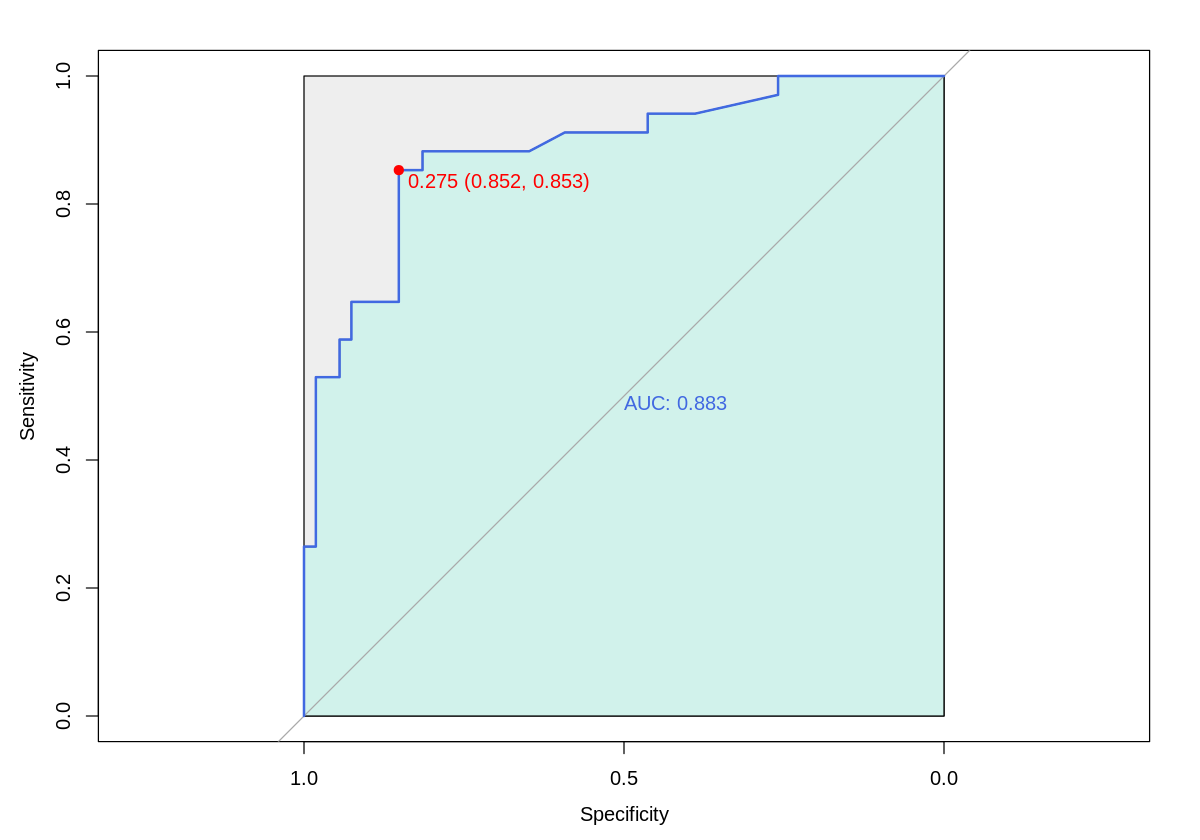

In [ ]:
roc_c <- pROC::roc(predict_check$Survived, predict_check$predict_value)
pROC::plot.roc(roc_c,
        col = "royalblue",
        print.auc=TRUE,
        max.auc.polygon = TRUE,
        print.thres = TRUE, print.thres.pch = 19, print.thres.col = "red",
        auc.polygon = TRUE, auc.polygon.col = "#D1F2EB")

13. ROC 곡선으로 구해진 cut off value를 적용하여 predict_check에서 predict_Survived를 설정
하여 predict_cutoff_roc에 저장하세요. (Hint) mutate( as.factor( ifelse() ) )

In [ ]:
pROC::coords(roc_c, "best", ret = "threshold", transpose = F)

threshold
<dbl>
0.2750422


In [ ]:
predict_cutoff_roc <- predict_check %>% mutate(predict_Survived = as.factor(ifelse(predict_value > 0.2750422, 1, 0)))

predict_cutoff_roc %>% show()

# A tibble: 88 × 3
   Survived predict_value predict_Survived
   <fct>            <dbl> <fct>           
 1 0               0.101  0               
 2 1               0.868  1               
 3 1               0.229  0               
 4 1               0.439  1               
 5 0               0.0503 0               
 6 0               0.0532 0               
 7 0               0.214  0               
 8 0               0.137  0               
 9 0               0.112  0               
10 0               0.116  0               
# ℹ 78 more rows


14. 아래는 모델을 재구성하지 않은 모델 m과 재구성한 모델 mback을 비교한 스크립트입니다. 모델 재구성 결과가 어떠한 차이를 발생시키는지 확인하세요.

Setting levels: control = 0, case = 1

Setting direction: controls < cases



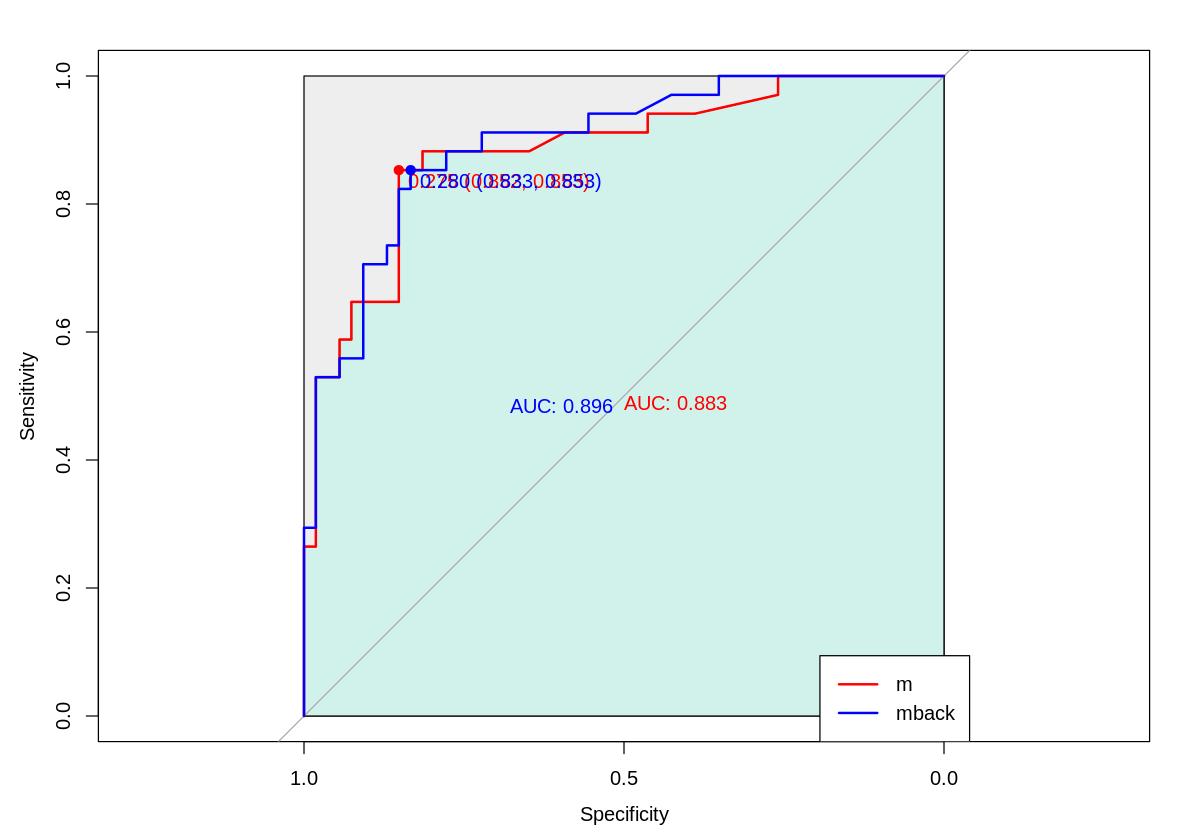

In [ ]:
predict_value_mback <- predict(m, test, type = "response") %>%
 tibble(predict_value = .)

predict_check_mback <- test %>%
 select(Survived) %>%
 dplyr::bind_cols(., predict_value_mback)

pROC::plot.roc(roc_c, col = "red",
          print.auc=T, max.auc.polygon=T,
          print.thres=T, print.thres.pch=19, print.thres.col = "red",
          auc.polygon=T, auc.polygon.col="#D1F2EB")

roc_c_mback <- pROC::roc(predict_check_mback$Survived, predict_check_mback$predict_value)

pROC::plot.roc(roc_c_mback, add=T, # 기본 그래프에 추가할 수 있도록 설정
              col="blue",
              print.auc=T, print.auc.adj=c(1.11,1.2),
              print.thres=T,print.thres.pch=19, print.thres.col = "blue")

legend("bottomright", legend=c("m", "mback"), col=c("red", "blue"), lwd = 2)

#약간의 미세한 차이점이 존재한다

15. 위 문제에서 구한 predict_cutoff_roc$Survived와 predict_cutoff_roc$predict_Survived 사이
의 혼돈 매트릭스를 구해 정확도 및 성능지표를 확인하세요. (Hint) caret::confusionMatrix()

In [ ]:
caret::confusionMatrix(predict_cutoff_roc$Survived, predict_cutoff_roc$predict_Survived)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 46  8
         1  5 29
                                          
               Accuracy : 0.8523          
                 95% CI : (0.7606, 0.9189)
    No Information Rate : 0.5795          
    P-Value [Acc > NIR] : 3.41e-08        
                                          
                  Kappa : 0.6935          
                                          
 Mcnemar's Test P-Value : 0.5791          
                                          
            Sensitivity : 0.9020          
            Specificity : 0.7838          
         Pos Pred Value : 0.8519          
         Neg Pred Value : 0.8529          
             Prevalence : 0.5795          
         Detection Rate : 0.5227          
   Detection Prevalence : 0.6136          
      Balanced Accuracy : 0.8429          
                                          
       'Positive' Class : 0               
                                    